In [ ]:
import json
import pandas as pd
import matplotlib as mp
# for language detection
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from pathlib import Path
from urllib.parse import urlparse

In [2]:
# store useful stats from exploration
exploration_statistics = {
    "total records" : 0,
    "null text records" : 0
}

In [3]:
# writing a function to generate markdown report on data
def generate_md_pipeline_report(stats_dict:dict, output_path: str):
    """
    Generate a markdown report for view of key metrics
    """
    lines = []
    lines.append("# Data cleaning summary")
    lines.append(f"Total pipeline records is {stats_dict['total records']}")

    lines.append("# Languages summary")
    for lan, val in zip(stats_dict['language value counts'].index, stats_dict['language value counts'].values):
        lines.append(f" {lan}: {val}")


    md_text = "\n".join(lines)
    Path(output_path).write_text(md_text, encoding="utf-8")

In [4]:
generate_md_pipeline_report(exploration_statistics,"./summary_report.md")

KeyError: 'language value counts'

In [5]:
exploration_statistics['language value counts'].values

KeyError: 'language value counts'

In [5]:
filepath = "../../data/raw/mainpipe_data_v1.jsonl"
data = []

with open(filepath, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            continue

df = pd.DataFrame(data)
print(df)

                                                     text  \
0       In the never ending battle to rid Alaska of it...   
1       » Jackpot | Deutsche Online Casinos und Casino...   
2       This really was an unexpected pleasure. When I...   
3       def files(self):\n        """Files in torrent....   
4       Patient engagement in the design and delivery ...   
...                                                   ...   
269373  Our 1 to 1 Karting lessons are ideal to give y...   
269374  function read(model) {\n  var query = argument...   
269375  In a land that is already fragile with earthqu...   
269376                                  Simple, YES on 8!   
269377  <p>How would I be able to get N results for se...   

                                                      url  
0                                                    None  
1         http://www.casinodeutsch.net/stichwort/jackpot/  
2       http://leekat.booklikes.com/post/608842/an-une...  
3       https://github.com/

In [6]:
exploration_statistics['total records'] = df.shape[0]

# Looking into data sources

In [ ]:
# get base urls
df['base_url'] = df['url'].apply(lambda x: f"{urlparse(x).scheme}://{urlparse(x).netloc}")


In [30]:
df['base_url'].value_counts().head(20)

base_url
b''://b''                            90519
https://github.com                   71415
https://www.taiwannews.com.tw         2583
https://en.wikipedia.org              2326
https://placeholder.co                2110
https://sample-company.net            1997
https://example.com                   1991
https://testsite.org                  1964
https://demo-page.info                1938
http://abcnews.go.com                 1771
http://www.nigeriatoday.ng            1290
https://www.yahoo.com                  946
https://www.nigeriatoday.ng            872
http://www.israelnationalnews.com      746
https://www.nytimes.com                735
http://www.wafb.com                    650
http://uproxx.com                      624
http://newyork.cbslocal.com            463
https://www.engadget.com               452
http://www.taiwannews.com.tw           447
Name: count, dtype: int64

In [44]:
# looking specifically into github sources, as they are the most prevalent url
github_df = df[df['base_url']=='https://github.com']
github_df.to_csv('github rows.csv')

In [50]:
# interestingly most github sources here are JS or python,
# seeing what the text starts with
github_df['programminglanguage'] = github_df['text'].str.extract(r'^(\S+)')
github_df['programminglanguage'].value_counts()

C:\Users\micha\AppData\Local\Temp\ipykernel_11324\2427923053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_df['programminglanguage'] = github_df['text'].str.extract(r'^(\S+)')


programminglanguage
def                   32002
function              31678
function()             1032
async                   808
function(               528
                      ...  
function(metadata,        2
The                       1
I                         1
We                        1
This                      1
Name: count, Length: 1175, dtype: int64

# Looking into length distributions

In [7]:
df['textlength'] = df['text'].str.len()


In [ ]:
# Looking into very short docs
# justify why using 10 words
df_short_docs = df[df['textlength'] < 10]
df_short_docs

,text,url,textlength
549,OK,None,2
736,Thanks,None,6
996,Good.,None,5
1100,LOL,None,3
2277,2016,None,4
...,...,...,...
264909,Kool-aid,None,8
266444,OK,None,2
266530,How so?,None,7
266723,Why?,None,4


In [ ]:
# Looking into very long docs
# justification of 20,000
df_long_docs = df[df['textlength'] > 20000]
df_long_docs
# Split in paragraphs?

,text,url,textlength
244,British Virgin Islands\n\nThe British Virgin I...,https://en.wikipedia.org/wiki/British%20Virgin...,32563
733,"Apollo 12\n\nApollo 12 (November 14–24, 1969) ...",https://en.wikipedia.org/wiki/Apollo%2012,36948
863,Blood libel\n\nBlood libel or ritual murder li...,https://en.wikipedia.org/wiki/Blood%20libel,41584
902,"Chipre • es.knowledger.de\nChipre , oficialmen...",http://es.knowledger.de/0004786/Chipre,62833
953,"Aspirin\n\nAspirin, also known as acetylsalicy...",https://en.wikipedia.org/wiki/Aspirin,51290
...,...,...,...
268218,Economy of Canada\n\nThe economy of Canada is ...,https://en.wikipedia.org/wiki/Economy%20of%20C...,37259
268249,British Army\n\nThe British Army is the princi...,https://en.wikipedia.org/wiki/British%20Army,54162
268478,Baseball statistics\n\nBaseball statistics pla...,https://en.wikipedia.org/wiki/Baseball%20stati...,21601
268660,American Civil Liberties Union\n\nThe American...,https://en.wikipedia.org/wiki/American%20Civil...,117968


<Axes: >

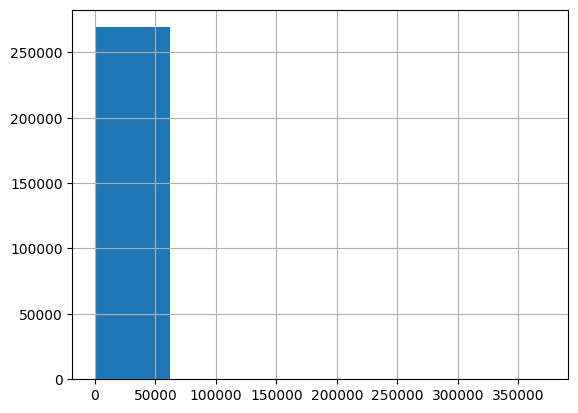

In [9]:
df['textlength'].hist(bins=6)

In [10]:
df['textlength'].max()

np.int64(372627)

# Looking at duplicates

In [15]:
# initial look at exact duplicates
print(int(df['text'].duplicated().sum()))

48482


# Looking into UTF-8 encoding

In [11]:
# using to_string defaults the text encoding to utf-8
df['text'] = df['text'].to_string()

# Looking into null/empty text entries

In [12]:
print(df['text'].isnull().sum())
# No null entries in the text col
exploration_statistics["null text records"] = int(df['text'].isnull().sum())

0


# Looking into empty urls

In [27]:
exploration_statistics

{'total records': 269378, 'null text records': 0, 'null urls': 90519}

In [26]:
print(df['url'].isna().sum()) # there is a significant amount of entries with no url
exploration_statistics["null urls"] = int(df['url'].isna().sum())
df_empty_urls = df[df['url'].isna()]
df_empty_urls

90519


,text,url
0,In the never ending battle to rid Alaska of it...,None
7,<p>Ubuntu 9.10</p>\n\n<p>Silly question time: ...,None
8,"Actually, if during the commission of a felony...",None
10,<p>I'd like to setup a column in excel with se...,None
11,Very Cool.,None
...,...,...
269367,<p>I have Firefox 10.6.3 installed on Mac OS X...,None
269370,I remember reading The Catcher in the Rye at 1...,None
269375,In a land that is already fragile with earthqu...,None
269376,"Simple, YES on 8!",None


In [ ]:
# for now the empty urls will be ignored but this is notably a data sourcing issue
# how do you explain this data if you need to later?

# Looking into website sources

In [7]:
value_counts = df['url'].value_counts()
value_counts.to_csv('value counts.txt')

In [8]:
df['Base url'] = df['url'].str.

SyntaxError: invalid syntax (775707707.py, line 1)

# Manual data inspection

In [14]:
df['text'].sample(20, random_state=42).to_csv('sample1.txt')

In [16]:
df['text'].sample(20, random_state=41).to_csv('sample2.txt')

# Languages

In [28]:
# Looking at the languages in the text data using langdetect
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

df['language'] = df['text'].apply(detect_language)

In [30]:
exploration_statistics['language value counts'] = df['language'].value_counts()

In [35]:
df['language'].value_counts()

language
en         244558
de          10309
es           8626
fr           1521
ca           1249
da            856
it            283
sv            254
ro            245
no            245
nl            233
af            178
pt            116
cy             92
Unknown        92
ru             69
so             68
id             53
sq             51
tl             48
et             36
sk             28
uk             26
fi             22
pl             21
hr             16
tr             15
vi             15
sl             11
lt             10
hu              9
sw              7
bg              5
lv              4
mk              4
cs              2
he              1
Name: count, dtype: int64

In [31]:
exploration_statistics

{'total records': 269378,
 'null text records': 0,
 'null urls': 90519,
 'language value counts': language
 en         244558
 de          10309
 es           8626
 fr           1521
 ca           1249
 da            856
 it            283
 sv            254
 ro            245
 no            245
 nl            233
 af            178
 pt            116
 cy             92
 Unknown        92
 ru             69
 so             68
 id             53
 sq             51
 tl             48
 et             36
 sk             28
 uk             26
 fi             22
 pl             21
 hr             16
 tr             15
 vi             15
 sl             11
 lt             10
 hu              9
 sw              7
 bg              5
 lv              4
 mk              4
 cs              2
 he              1
 Name: count, dtype: int64}

In [34]:
# Interestingly there are some rows with unknown language
unknown_languages_df = df[df['language'] == "Unknown"]
unknown_languages_df.to_csv('unknown_languages.txt')

In [ ]:
# Notably most of the unknown language entries are emojis or URLS in the text column
# or '+1'

# Functions

In [31]:
# how many rows contain 'def ' as a marker for functions
print(int(df['text'].str.contains('def ').sum()))


33139


In [32]:
functions_df = df[df['text'].str.contains('def ')]
functions_df

,text,url,textlength,base_url
3,"def files(self):\n """"""Files in torrent....",https://github.com/idlesign/torrentool/blob/78...,527,https://github.com
12,"def list_friends(self, delegate, user=None, pa...",https://github.com/dustin/twitty-twister/blob/...,437,https://github.com
18,"def friendly_name(self):\n """"""Get frien...",https://github.com/happyleavesaoc/python-snapc...,223,https://github.com
22,"def make_filter_list(filters):\n """"""Transfo...",https://github.com/dfm/python-fsps/blob/29b81d...,624,https://github.com
33,"def bisect(func, a, b, xtol=1e-6, errorcontrol...",https://github.com/andim/noisyopt/blob/91a748f...,2894,https://github.com
...,...,...,...,...
269334,"def ticker(rest):\n\t""Look up a ticker symbol'...",https://github.com/yougov/pmxbot/blob/5da84a32...,721,https://github.com
269341,"def setproxy(ctx, proxy_account, account):\n ...",https://github.com/bitshares/uptick/blob/66c10...,165,https://github.com
269343,"def _lookup_consumer_tag_by_consumer(self, con...",https://github.com/agoragames/haigha/blob/7b00...,443,https://github.com
269358,"def xrify_tuples(self, tup):\n """"""Make ...",https://github.com/pytroll/trollimage/blob/d35...,219,https://github.com


In [33]:
# looking into the sources of function text
functions_df['base_url'].value_counts()

base_url
https://github.com                         32530
b''://b''                                    578
https://en.wikipedia.org                       4
http://nehandaradio.com                        2
https://easy3monthpaydayloans12.co.uk          1
https://variety.com                            1
https://www.bachmanntrains.com                 1
https://lushalot.com                           1
http://www.beritaharian.sg                     1
http://hemeroteca.lavanguardia.com             1
http://www.eatingwell.com                      1
https://forum.purseblog.com                    1
https://accu.org                               1
http://engagingthemoment.com                   1
https://www.engadget.com                       1
https://www.rodef-shalom.org                   1
https://rumratings.com                         1
https://www.bellechantelle.com                 1
https://www.bigmacktrucks.com                  1
https://cwecrc.de                              1
http://tape

In [42]:
githubdf = functions_df[functions_df['base_url'] == 'https://github.com']
githubdf.to_csv("Github code pages.csv")

In [38]:
functions_df.loc[126288, 'text']

"Another Mp7 question. I am looking for #3 exhaust pipe for a 2007 ctp713b. Mack part #4ME5160AM. The local mack dealer isn't much help. Anybody deal much with bafter market? Where is a good place to try? Thanks.\ni have a 2007 pre def mp7. Trying to remove the plug for the injector harness on back of the engine. Whats the trick?"